In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.html import widgets

%matplotlib inline

## Image Processing in OpenCV
- [resource](http://docs.opencv.org/trunk/doc/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html#py-table-of-content-imgproc)
- [HIPR morphology page](http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm)

### topics covered
- Morphological Transformations

### Morphological Transformations

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our `original image`, second one is called `structuring element or kernel` which decides the nature of operation. Two basic morphological operators are **Erosion** and **Dilation**. Then its variant forms like **Opening**, **Closing**, **Gradient** etc also comes into play. 

(150, 112)


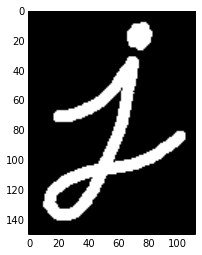

In [2]:
j = cv2.imread("public-images/j.png", cv2.IMREAD_GRAYSCALE)
print j.shape
plt.imshow(j, cmap = plt.cm.gray)

#### 1. Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (**Always try to keep foreground in white**). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. **So the thickness or size of the foreground object decreases or simply white region decreases in the image.** It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

**kernels are 2D matrices, such as np.ones(kernel_size, kernel_size)**

<function __main__.erosion_effect>

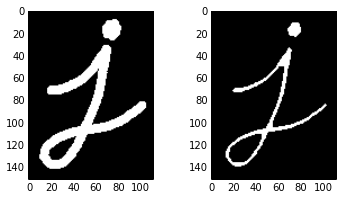

In [3]:
def erosion_effect(img, kernel_sz, method):
    kernel = np.ones((kernel_sz, kernel_sz))
    erosed_img = method(img, kernel, )
    fig, axes = plt.subplots(1, 2, figsize = (6, 3))
    axes[0].imshow(img, cmap = plt.cm.gray)
    axes[1].imshow(erosed_img, cmap = plt.cm.gray)
    
widgets.interact(erosion_effect, 
                 img = widgets.fixed(j), 
                 kernel_sz=(1, 10, 1),
                 method = {"erosion": cv2.erode})

#### 2. Dilation

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. **Normally, in cases like noise removal, erosion is followed by dilation.** Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

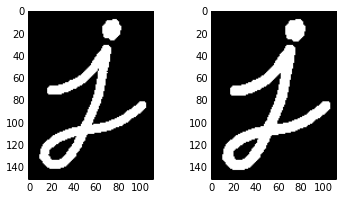

In [4]:
def erosion_effect(img, kernel_sz, method):
    kernel = np.ones((kernel_sz, kernel_sz))
    new_img = method(img, kernel, )
    fig, axes = plt.subplots(1, 2, figsize = (6, 3))
    axes[0].imshow(img, cmap = plt.cm.gray)
    axes[1].imshow(new_img, cmap = plt.cm.gray)
    
widgets.interact(erosion_effect, 
                 img = widgets.fixed(j), 
                 kernel_sz=(1, 10, 1),
                 method = {"dilation": cv2.dilate})

(475, 475, 3) uint8


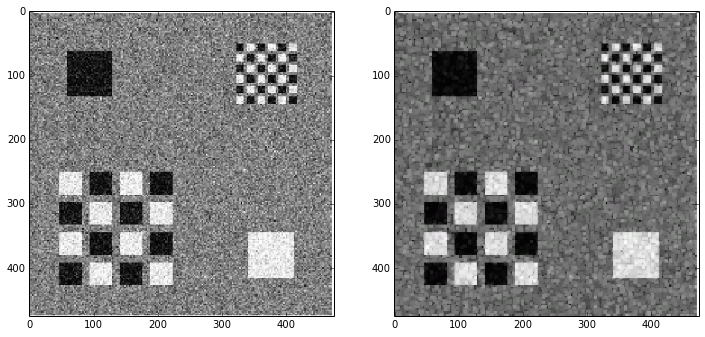

In [13]:
from skimage import io

edge_noise = io.imread("public-images/edge_noise.gif")
print edge_noise.shape, edge_noise.dtype

kernel = np.ones((5, 5))
edge_ed = cv2.dilate(cv2.erode(edge_noise, kernel), kernel)

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
axes[0].imshow(edge_noise, cmap = plt.cm.gray)
axes[1].imshow(edge_ed, cmap = plt.cm.gray)

#### 3. Opening - remove Salts

**Opening is just another name of erosion followed by dilation.** It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

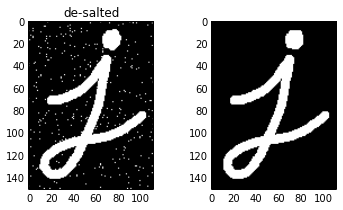

In [42]:
noise = ((np.random.rand(*j.shape) > 0.98)*255 ).astype(j.dtype)
noised_j = cv2.bitwise_or(j, noise, )

kernel = np.ones((5, 5))
denoised_j = cv2.morphologyEx(noised_j, 
                              op = cv2.MORPH_OPEN, 
                              kernel = kernel)

fig, axes = plt.subplots(1, 2, figsize = (6, 3))
axes[0].imshow(noised_j, cmap = plt.cm.gray)
axes[0].set_title("salted")
axes[1].imshow(denoised_j, cmap = plt.cm.gray)
axes[0].set_title("de-salted")

#### 4. Closing - remove Peppers (or Bubbles in foreground)

Closing is reverse of Opening, Dilation followed by Erosion. **It is useful in closing small holes inside the foreground objects, or small black points on the object.**

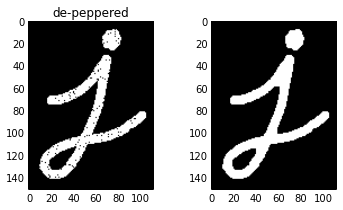

In [46]:
noise = ((np.random.rand(*j.shape) < 0.95)*255 ).astype(j.dtype)
noised_j = cv2.bitwise_and(j, noise, )

kernel = np.ones((5, 5))
denoised_j = cv2.morphologyEx(noised_j, 
                              op = cv2.MORPH_CLOSE, 
                              kernel = kernel)

fig, axes = plt.subplots(1, 2, figsize = (6, 3))
axes[0].imshow(noised_j, cmap = plt.cm.gray)
axes[0].set_title("peppered")
axes[1].imshow(denoised_j, cmap = plt.cm.gray)
axes[0].set_title("de-peppered")

#### 5. Morphological Gradient

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

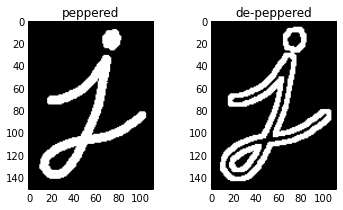

In [48]:
kernel = np.ones((5, 5))
skeleton_j = cv2.morphologyEx(j, 
                              op = cv2.MORPH_GRADIENT, 
                              kernel = kernel)

fig, axes = plt.subplots(1, 2, figsize = (6, 3))
axes[0].imshow(j, cmap = plt.cm.gray)
axes[0].set_title("peppered")
axes[1].imshow(skeleton_j, cmap = plt.cm.gray)
axes[1].set_title("de-peppered")

##### 6. Top hat - salt noise

It is the difference between input image and Opening of the image. 

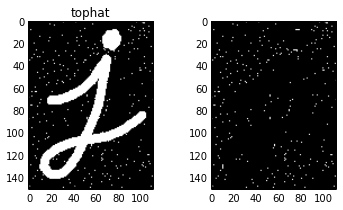

In [50]:
noise = ((np.random.rand(*j.shape) > 0.98)*255 ).astype(j.dtype)
noised_j = cv2.bitwise_or(j, noise, )

kernel = np.ones((5, 5))
pure_noise = cv2.morphologyEx(noised_j, cv2.MORPH_TOPHAT, kernel)

fig, axes = plt.subplots(1, 2, figsize = (6, 3))
axes[0].imshow(noised_j, cmap = plt.cm.gray)
axes[0].set_title("j with noise")
axes[1].imshow(pure_noise, cmap = plt.cm.gray)
axes[0].set_title("tophat")

#### 7. Black hat - peper noise

It is the difference between the closing of the input image and input image.

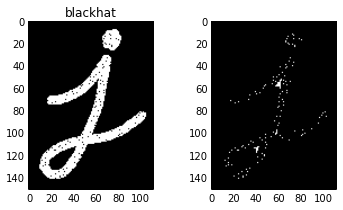

In [52]:
noise = ((np.random.rand(*j.shape) < 0.95)*255 ).astype(j.dtype)
noised_j = cv2.bitwise_and(j, noise, )

kernel = np.ones((5, 5))
pure_noise = cv2.morphologyEx(noised_j, cv2.MORPH_BLACKHAT, kernel)

fig, axes = plt.subplots(1, 2, figsize = (6, 3))
axes[0].imshow(noised_j, cmap = plt.cm.gray)
axes[0].set_title("j with noise")
axes[1].imshow(pure_noise, cmap = plt.cm.gray)
axes[0].set_title("blackhat")

#### 8. Structuring element

We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

In [55]:
print cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
